In [1]:
%matplotlib inline
import platform
print(platform.python_version())
from ROOT import TFile,vector
import ROOT

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import math


import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.interpolate import interp1d
from scipy.integrate import quad
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import copy

import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

3.5.2
Welcome to JupyROOT 6.14/08


In [2]:
background_folder = "/home/kmason/pythonscratch_newshowerreco/dllee_unified/1L1PSelection/data/backgrounds/"
background_e_1 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run1.txt",'r')
background_e_2 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run2.txt",'r')
background_e_3 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run3.txt",'r')

#initialize output vector
Ee_v = []
Ep_v = []
costheta_p_v = []
costheta_e_v = []
Enu_v=[]
bdt_v = []
#get variable lists from the selected events text list 
#From 1e1p files :r[0],s[1],e[2],CCNC[39],Etrue[38]
#From 1e1p files :r[0],s[1],e[2],CCNC[47],Etrue[46]

next(background_e_1)#remove header line
for line in background_e_1:
    vals = line.split(" ")
    selected_Ep=float(vals[22])
    selected_Ee=float(vals[23])
    selected_thetap=float(vals[16])
    selected_thetae=float(vals[24])
    selected_Enu=float(vals[4])
    selected_bdt=float(vals[len(vals)-1])
    if (selected_bdt >= 0.95 and selected_Enu >500):
        Enu_v.append(selected_Enu)
        bdt_v.append(selected_bdt)
        Ep_v.append(selected_Ep)
        Ee_v.append(selected_Ee)
        costheta_p_v.append(selected_thetap)
        costheta_e_v.append(selected_thetae)

next(background_e_2)#remove header line
for line in background_e_2:
    vals = line.split(" ")
    selected_Ep=float(vals[22])
    selected_Ee=float(vals[23])
    selected_thetap=float(vals[16])
    selected_thetae=float(vals[24])
    selected_Enu=float(vals[4])
    selected_bdt=float(vals[len(vals)-1])
    if (selected_bdt >= 0.95 and selected_Enu >500):
        Enu_v.append(selected_Enu)
        bdt_v.append(selected_bdt)
        Ep_v.append(selected_Ep)
        Ee_v.append(selected_Ee)
        costheta_p_v.append(selected_thetap)
        costheta_e_v.append(selected_thetae)
        
next(background_e_3)#remove header line
for line in background_e_3:
    vals = line.split(" ")
    selected_Ep=float(vals[22])
    selected_Ee=float(vals[23])
    selected_thetap=float(vals[16])
    selected_thetae=float(vals[24])
    selected_Enu=float(vals[4])
    selected_bdt=float(vals[len(vals)-1])
    if (selected_bdt >= 0.95 and selected_Enu >500):
        Enu_v.append(selected_Enu)
        bdt_v.append(selected_bdt)
        Ep_v.append(selected_Ep)
        Ee_v.append(selected_Ee)
        costheta_p_v.append(selected_thetap)
        costheta_e_v.append(selected_thetae)
print(len(Enu_v))

20417


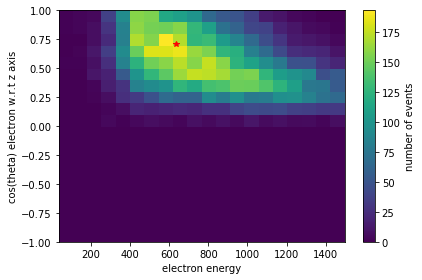

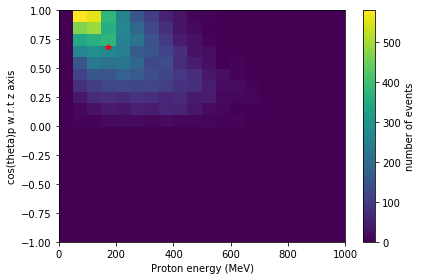

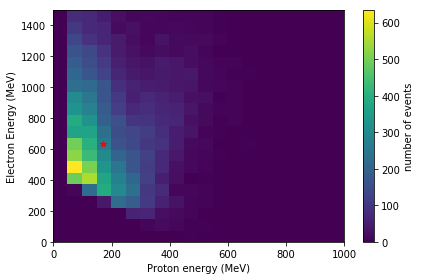

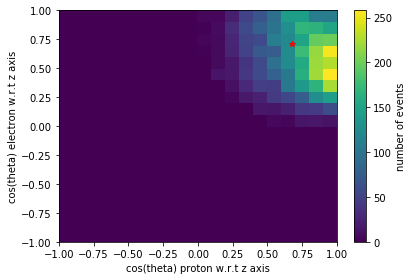

In [4]:
plt.hist2d(Ee_v, costheta_e_v, bins=(20,20), range = ((35,1500),(-1,1)))
plt.plot(635.63,.71,marker="*",color='red')
plt.xlabel('electron energy')
plt.ylabel('cos(theta) electron w.r.t z axis')
plt.colorbar(label='number of events')
plt.tight_layout()
plt.savefig('event_coss_vs_Es_1e1p.png')
plt.show()
plt.close()

plt.hist2d(Ep_v, costheta_p_v, bins=(20, 20), range = ((0,1000),(-1,1)))
plt.plot(170,.68,marker="*",color='red')
plt.xlabel('Proton energy (MeV)')
plt.ylabel('cos(theta)p w.r.t z axis')
plt.colorbar(label='number of events')
plt.tight_layout()
plt.savefig('event_cosp_vs_Ep_1e1p.png')
plt.show()
plt.close()

plt.hist2d(Ep_v, Ee_v, bins=(20, 20), range = ((0,1000),(0,1500)))
plt.plot(170,635,marker="*",color='red')
plt.xlabel('Proton energy (MeV)')
plt.ylabel('Electron Energy (MeV)')
plt.colorbar(label='number of events')
plt.tight_layout()
plt.savefig('event_Ep_vs_Es_1e1p.png')
plt.show()
plt.close()

plt.hist2d(costheta_p_v, costheta_e_v, bins=(20, 20), range = ((-1,1),(-1,1)))
plt.plot(.68,.71,marker="*",color='red')
plt.xlabel('cos(theta) proton w.r.t z axis')
plt.ylabel('cos(theta) electron w.r.t z axis')
plt.tight_layout()
plt.colorbar(label='number of events')
plt.savefig('event_coss_vs_cosp_1e1p.png')
plt.show()
plt.close()


# plt.hist2d(costheta_e_v,Econs_v, bins=(20, 20), range = ((-1,1),(-1,1)),weights=var_w)
# plt.plot(.71,(635.0-17.0)/(635.0+17.0),marker="*",color='red')
# plt.ylabel('(E1-E2)/(E1+E2) of showers')
# plt.xlabel('cos(theta) electron w.r.t z axis')
# plt.tight_layout()
# plt.colorbar(label='number of events')
# plt.show()
# plt.savefig('event_asym_vs_coss_1e1p.png')
# plt.close()

# plt.hist2d(Ee_v,Econs_v, bins=(20, 20), range = ((0,1000),(-1,1)),weights=var_w)
# plt.plot(635,(635.0-17.0)/(635.0+17.0),marker="*",color='red')
# plt.ylabel('(E1-E2)/(E1+E2) of showers')
# plt.xlabel('leading electron energy (MeV)')
# plt.tight_layout()
# plt.colorbar(label='number of events')
# plt.show()
# plt.savefig('event_asym_vs_es_1e1p.png')
# plt.close()